# Goals:
- Identify subgroups of customers through data visualization
- Identify which features are most influential/have the highest variance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../raw_data/marketing_campaign.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,NumWebVisitsMonth,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,0,...,7,3,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,0,...,5,2,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,0,...,4,1,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,0,...,6,2,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,0,...,5,5,0,0,0,0,0,3,11,0


In [3]:
df.shape

(2240, 29)

# I. Data Wrangling

In [5]:
# Convert appid to string
df['ID'] = df['ID'].astype(str)

# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

## a) Categorical Columns

In [7]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [8]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Both categorical columns have some values to clean.

Education
- The definitions of 2n Cycle and Basic, and Graduation need to be verified.
- It seems that Basic refers to the international equivalent of K-12 or high school level education
- 2n cycle is a bit more ambiguous. In most cases, it seems to refer to a master's level education, which would make sense in the above distribution (odd for there to be more PhDs than Masters)
- Graduation can likely be assumed to be a 4-year college degree.

Marital Status
- Joke responses like Alone, Absurd, and YOLO need to be recategorized or dropped.

In [11]:
# Recode alone to single:
df['Marital_Status'] = np.where(df['Marital_Status']=='Alone', 'Single', df['Marital_Status'])

# Drop absurd and YOLO:
rows = [2093, 2134, 2177, 2202]
df.drop(index=rows, inplace=True)

# Ensure changes took place:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

## b) Numerical Columns

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2236.0,1968.796512,11.980604,1893.0,1959.0,1970.0,1977.0,1996.0
Income,2212.0,52232.510850,25187.455359,1730.0,35233.5,51381.5,68522.0,666666.0
Kidhome,2236.0,0.444991,0.538551,0.0,0.0,0.0,1.0,2.0
Teenhome,2236.0,0.506261,0.544615,0.0,0.0,0.0,1.0,2.0
Recency,2236.0,49.147138,28.954880,0.0,24.0,49.0,74.0,99.0
Complain,2236.0,0.009392,0.096477,0.0,0.0,0.0,0.0,1.0
Wines,2236.0,303.873435,336.876776,0.0,23.0,173.0,505.0,1493.0
Fruits,2236.0,26.271020,39.761356,0.0,1.0,8.0,33.0,199.0
MeatProducts,2236.0,166.924419,225.778550,0.0,16.0,67.0,232.0,1725.0
FishProducts,2236.0,37.405188,54.436749,0.0,3.0,12.0,50.0,259.0


Z_CostContact and Z_Revenue have constant values across all rows. They will be dropped.

In [15]:
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)

There seems to be one heavy outlier in the high income bracket that spends very little on all products. This customer will be dropped.

In [230]:
df.sort_values(by='Income', ascending=False).head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,...,NumStorePurchases,NumWebVisitsMonth,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,children
617,1503,1976,PhD,Together,162397.0,1,1,2013-03-06,31,0,...,1,1,0,0,0,0,0,0,0,2
687,1501,1982,PhD,Married,160803.0,0,0,2012-04-08,21,0,...,1,0,15,0,0,0,0,0,0,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-04-06,37,0,...,1,1,0,0,0,0,0,0,0,1
164,8475,1973,PhD,Married,157243.0,0,1,2014-01-03,98,0,...,0,0,15,0,0,0,0,0,0,1
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.drop(index=2233, inplace=True)

In [228]:
# Merge child and teens into a single column

df['children'] = df['Kidhome'] + df['Teenhome']
df[['Kidhome', 'Teenhome', 'children']].head(10)

,Kidhome,Teenhome,children
0,0,0,0
1,1,1,2
2,0,0,0
3,1,0,1
4,1,0,1
5,0,1,1
6,0,1,1
7,1,0,1
8,1,0,1
9,1,1,2


In [308]:
df[products].head()

,Wines,Fruits,MeatProducts,FishProducts,SweetProducts,GoldProducts
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15


In [309]:
# Create total spent column across all categories of purchases

products = ['Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProducts']

df['total_spent'] = df[products].sum(axis=1)
df['total_spent'].head()

0    1617
1      27
2     776
3      53
4     422
Name: total_spent, dtype: int64

# II. Exploratory Data Analysis

### a) Categorical Data

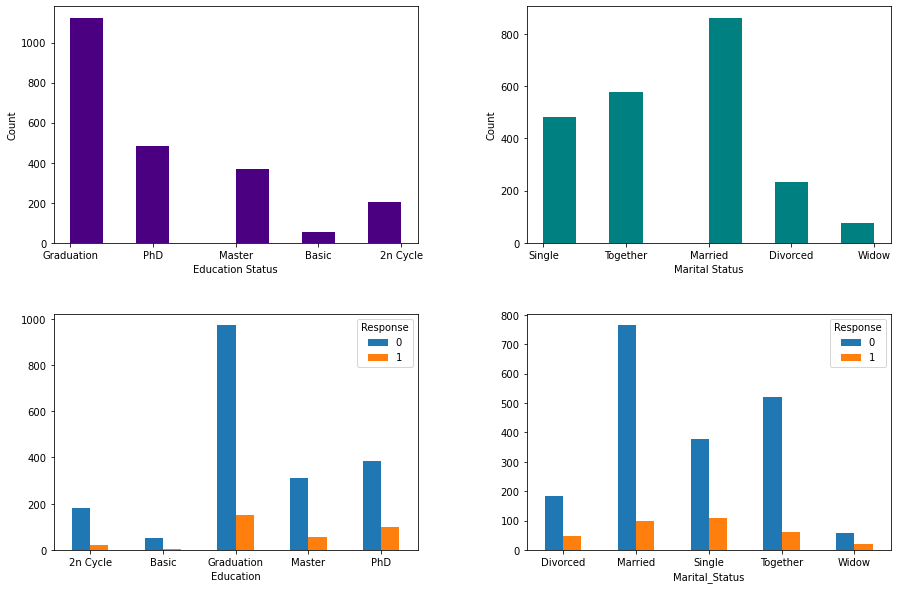

In [221]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

ax[0,0].hist(df['Education'], color='indigo');
ax[0,0].set_xlabel('Education Status')
ax[0,0].set_ylabel('Count')

ax[0,1].hist(df['Marital_Status'], color='teal');
ax[0,1].set_xlabel('Marital Status')
ax[0,1].set_ylabel('Count')

df_plot = df.groupby(['Education', 'Response']).size().reset_index().pivot(
    columns='Response', index='Education', values=0)
df_plot.plot(kind='bar', rot=0, ax=ax[1,0]);

df_plot = df.groupby(['Marital_Status', 'Response']).size().reset_index().pivot(
    columns='Response', index='Marital_Status', values=0)
df_plot.plot(kind='bar', rot=0, ax=ax[1,1]);

 ## b) Numerical Data

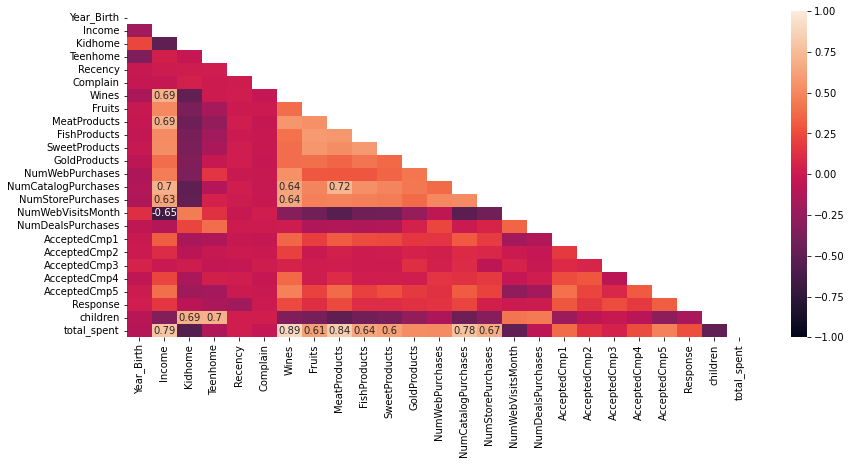

In [310]:
mask = (df.corr()>=.6) | (df.corr()<=-.6)

annotations = np.array(round(df.corr(), 2)[mask].astype(str))
annotations[np.isnan(df.corr()[mask])] = ""

matrix = np.triu(df.corr())

plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), annot=annotations, vmin=-1, vmax=1, fmt='', mask=matrix);

- Income seems to correlate highly with quite a few variables.
- Amount spent on wine has a strong correlation with catalog and in-store purchases.
- Meat purchases has a strong correlation with catalog purchases.

#### 1) Distribution

In [168]:
df.select_dtypes(include='number').columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain',
       'Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts',
       'GoldProducts', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response'],
      dtype='object')

In [250]:
# Separate numerical columns by category

personal = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'children', 'Recency', 'Complain']
products = ['Wines', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProducts', 'total_spent']
location = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
offers = ['NumDealsPurchases', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

num_cols = [personal, products, offers, location]

In [276]:
def plot_hist(columns, data, nrows=2, ncols=3, figsize=(10,10)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        sns.histplot(x=col, data=data, color='r', ax=ax)
        ax.set(xlabel=col)

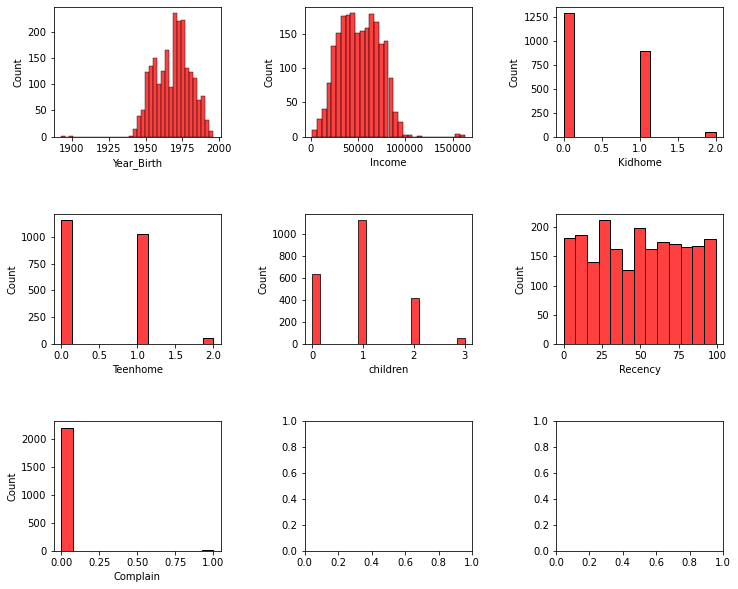

In [277]:
# Personal

plot_hist(personal, df, nrows=3, figsize=(12,10))

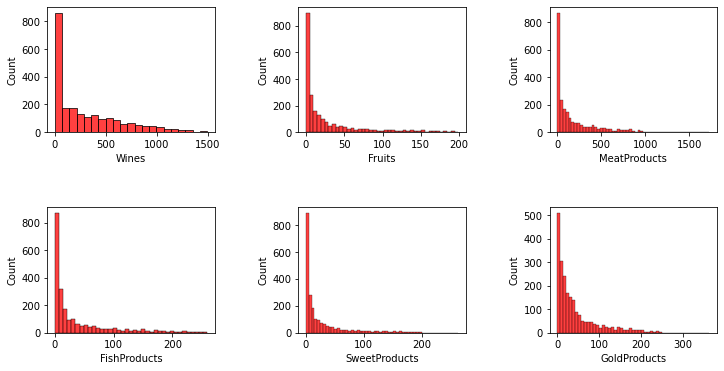

In [278]:
# Products

plot_hist(products, df, figsize=(12,6))

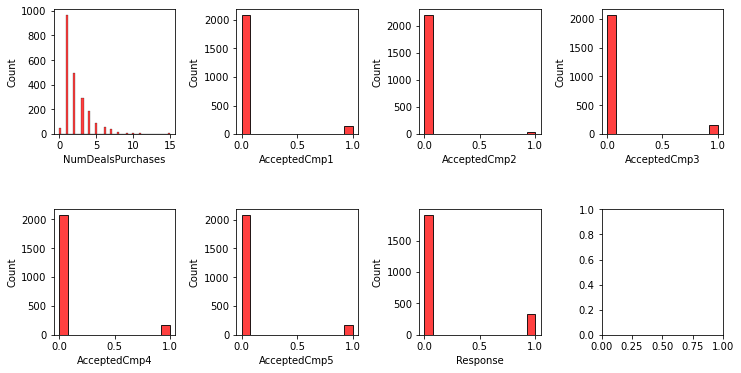

In [271]:
# Offers

plot_hist(offers, df, ncols=4, figsize=(12,6))

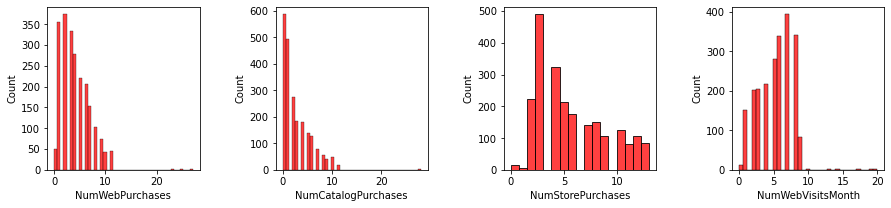

In [272]:
# Locations

plot_hist(location, df, nrows=1, ncols=4, figsize=(15,3))

#### 2) Interaction Effects

In [240]:
def plot_scatter(columns, target, data, nrows=3, ncols=3, figsize=(15,10)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        sns.scatterplot(x=col, y=target, data=data, alpha=0.5, hue='Response', ax=ax)
        ax.set(xlabel=col, ylabel=target)

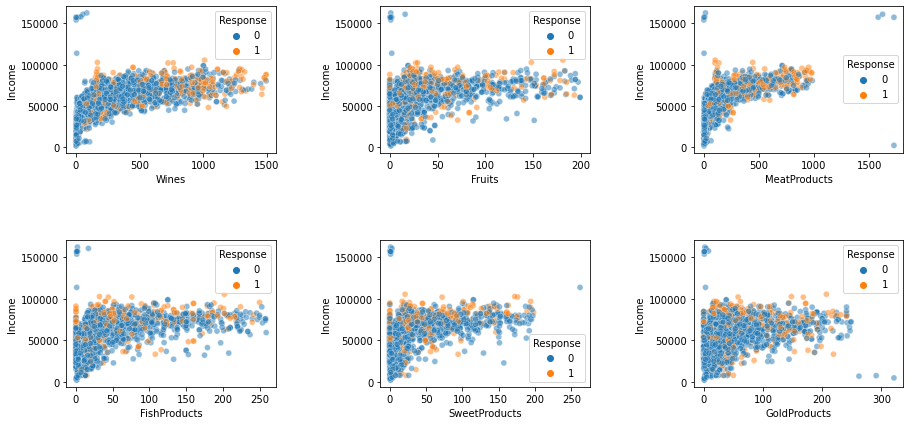

In [248]:
plot_scatter(products, 'Income', df, figsize=(15,7))

There seems to be some association between income and products purchases, but this effect gradually tapers off. Additionally, there seem to be a cluster of high earners who spend very little.

In [287]:
def plot_bar(cols, target, data, nrows=2, ncols=3, figsize=(15,10)):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    
    for i, cols in enumerate(cols):
        ax = axes.flatten()[i]
        plot1 = sns.barplot(x=cols, y=target, data=data, ax=ax)
        plot1.set_xticklabels(plot1.get_xticklabels())

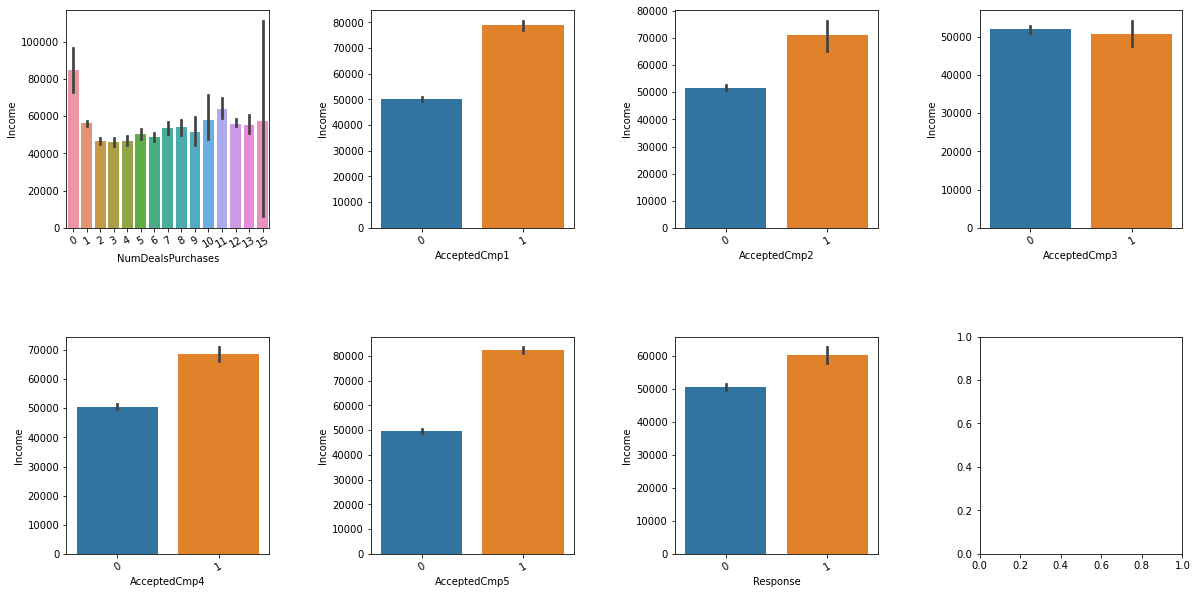

In [177]:
plot_bar(offers, 'Income', df, ncols=4, figsize=(20,10))

On average, people with higher incomes seem more likely to accept campaign offers. People who have never used a discount to make a purchase seem more likely to belong to a high income bracket. However, there seems to be high variability amongst customers who have made at least 15 purchases using discounts.

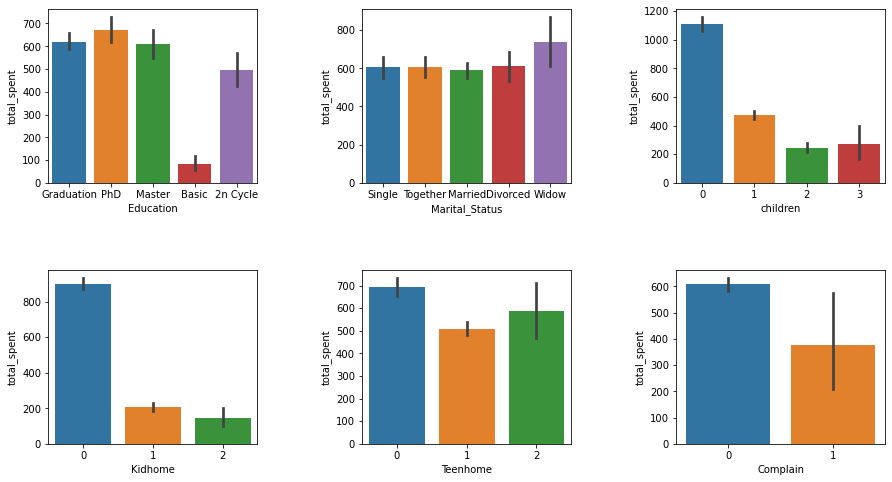

In [311]:
plot_bar(
    ['Education', 'Marital_Status', 'children', 'Kidhome', 'Teenhome', 'Complain'], 
    'total_spent', df, figsize=(15,8))

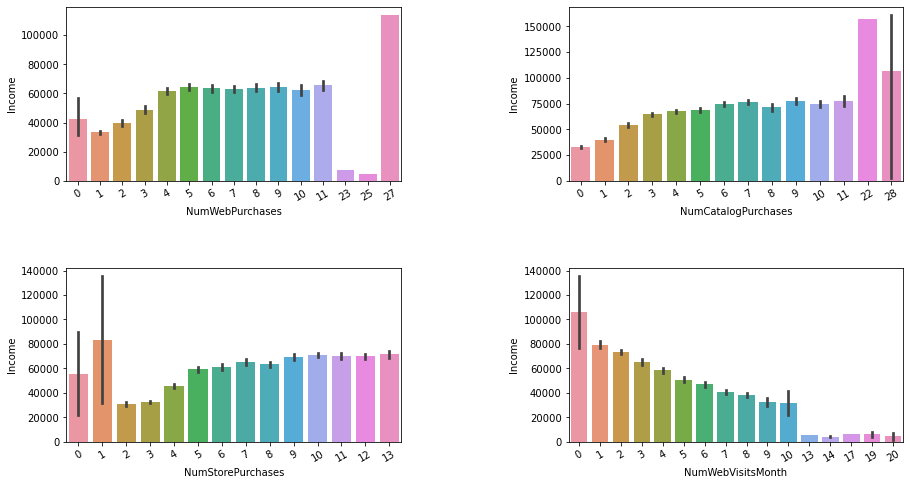

In [180]:
plot_bar(location, 'Income', df, nrows=2, ncols=2, figsize=(15,8))

These graphs show some interesting trends. High income customers seem to make fewer web visits, but more web purchases. There seems to be a lot of variability within customers who make very few store purchases, and customers who make many catalog purchases.

In [295]:
def cat_bar(cols, y, data, figsize=(20,30)):
    """Plot bar graphs that: a) compare mean values of a target to different levels of a column
    b) compare different levels of a column to different levels of a target"""
    fig, axes = plt.subplots(len(cols),2, figsize=figsize)
    fig.subplots_adjust(wspace=0.3, hspace=0.5)
    
    for i, cols in enumerate(cols):
        ax = axes.flatten()[i]
        plot1 = sns.barplot(x=cols, y=y, data=data, ax=axes[i,0])
        plot1.set_xticklabels(plot1.get_xticklabels())
                
        df_plot = data.groupby([cols, y]).size().reset_index().pivot(
            columns=y, index=cols, values=0)
        df_plot.plot(kind='bar', stacked=True, ax=axes[i,1])

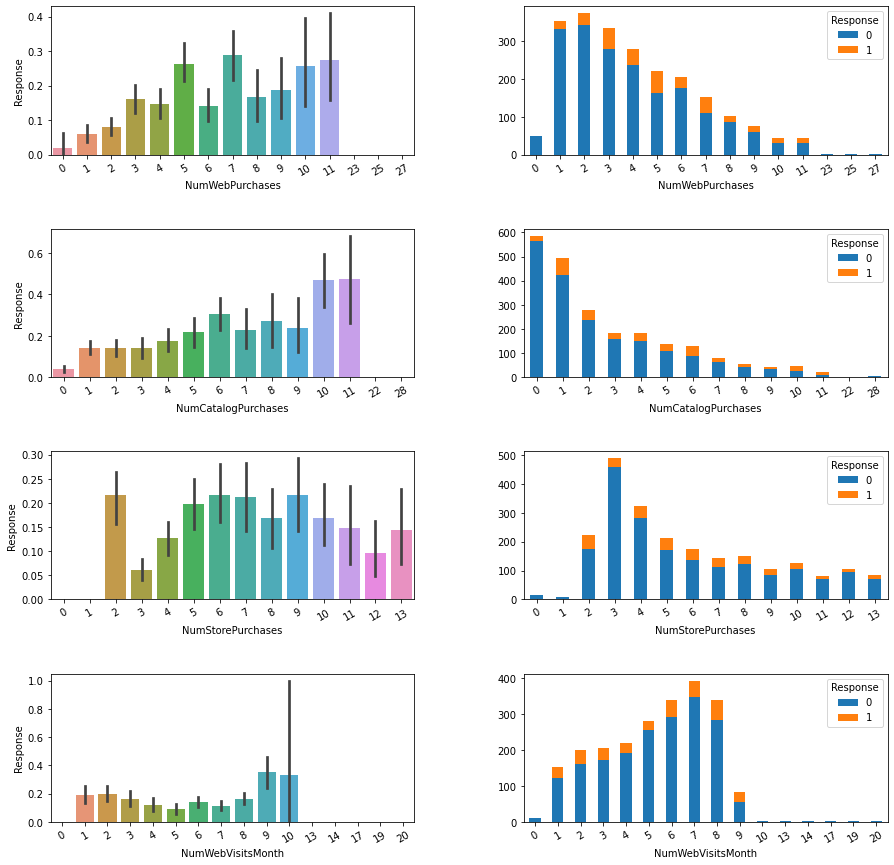

In [219]:
cat_bar(location, 'Response', df, figsize=(15,15))

fdfs


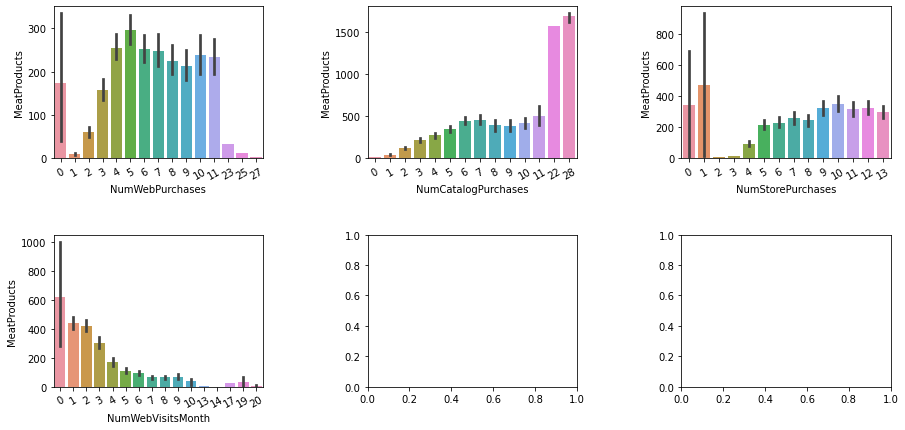

In [249]:
plot_bar(location, 'MeatProducts', df, figsize=(15,7))